<a href="https://colab.research.google.com/github/sam-guvs/CDD-2/blob/main/TAREA2_SAMARAVASQUEZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TAREA 2**






#### Base de datos: https://www.kaggle.com/datasets/jessicali9530/lfw-dataset

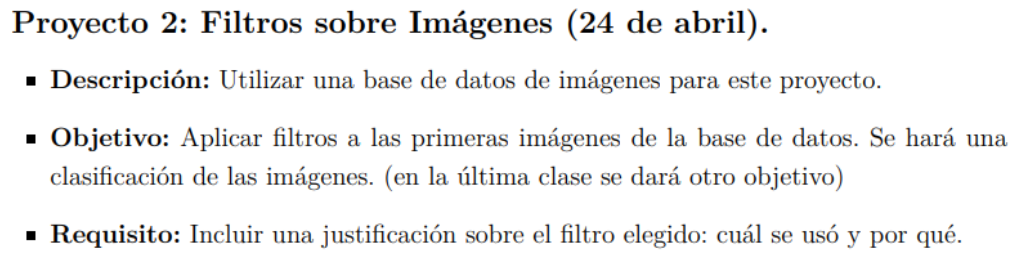

# Objetivo del Código: Cargar, visualizar y aplicar filtros de procesamiento de imágenes a un dataset de rostros (LFW) para exploración visual y posibles tareas de preprocesamiento.

## Nombre: Samara Nataly Vásquez Guzmán

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

# Ruta del archivo comprimido en Google Drive
archivo_zip = '/content/drive/MyDrive/MODO 6 CCD REDES NEURONALES /lfw-dataset.zip'

# Carpeta de destino donde se descomprimirá
carpeta_destino = '/content/drive/MyDrive/MODO 6 CCD REDES NEURONALES /DATOSTAREA2'

# Descomprimir el archivo
with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:
    zip_ref.extractall(carpeta_destino)

print("Descompresión completada")


Descompresión completada


In [ ]:
import os

# Verifica las carpetas dentro de la carpeta descomprimida
ruta = '/content/drive/MyDrive/MODO 6 CCD REDES NEURONALES /DATOSTAREA2'  # Ajusta la ruta si es diferente
carpetas = os.listdir(ruta)
carpetas = [c for c in carpetas if not c.startswith('.')]  # evitar carpetas ocultas

print("Número de personas:", len(carpetas))


Número de personas: 11


Número de personas: 5749


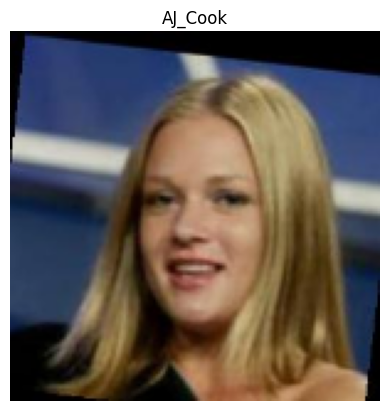

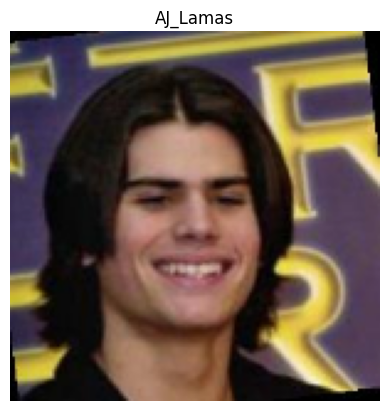

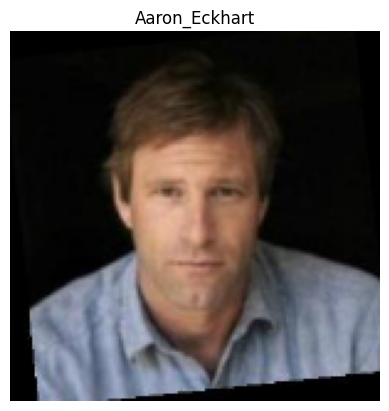

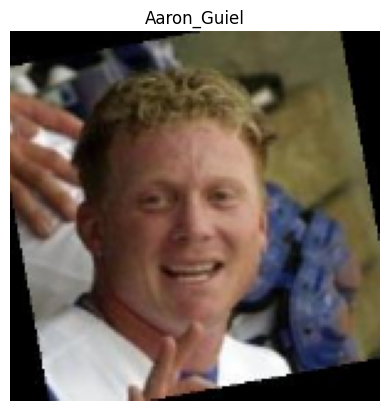

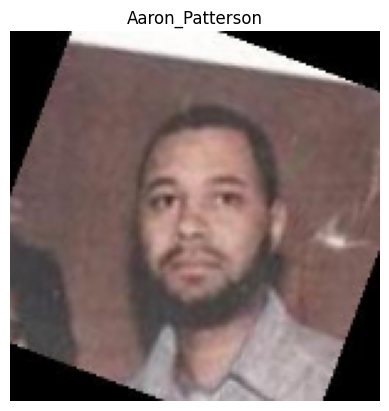

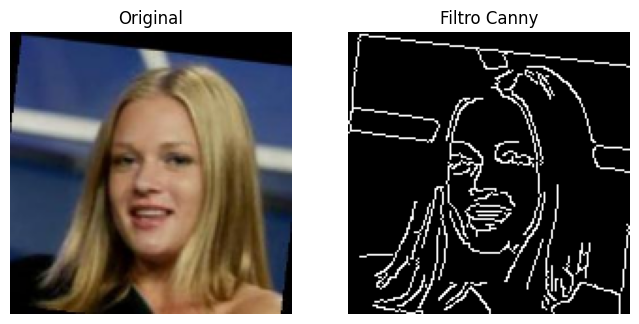

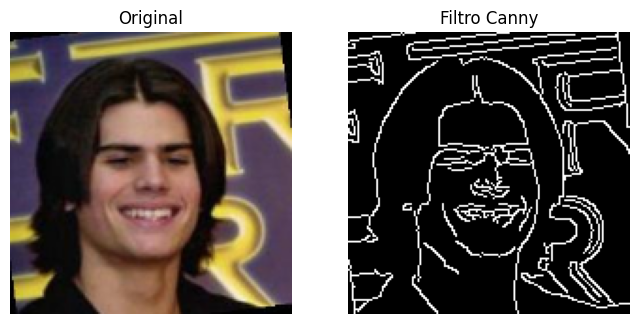

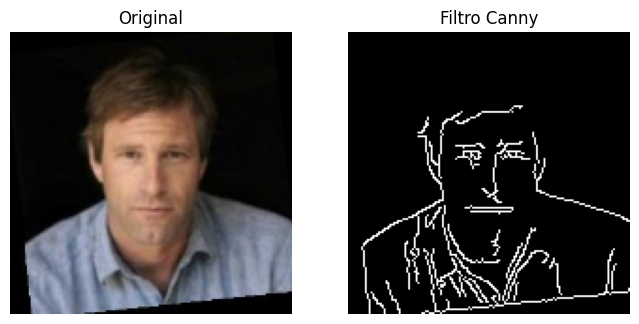

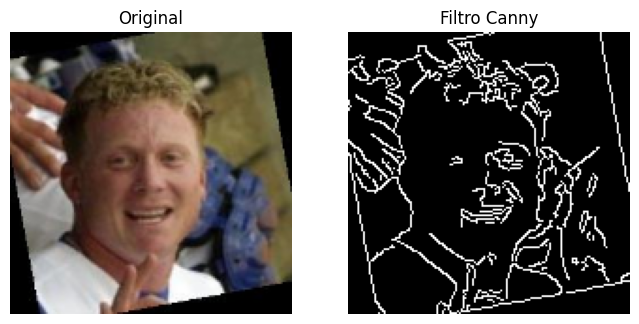

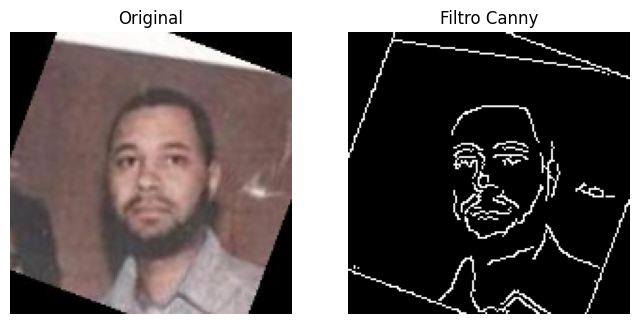

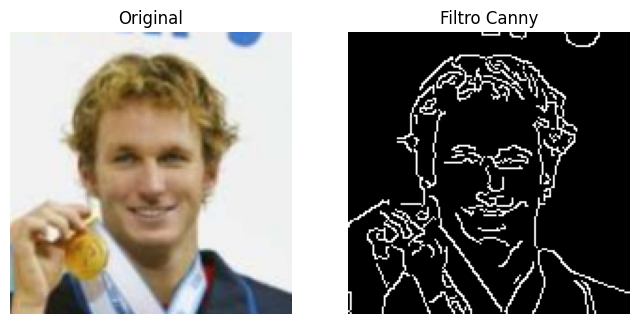

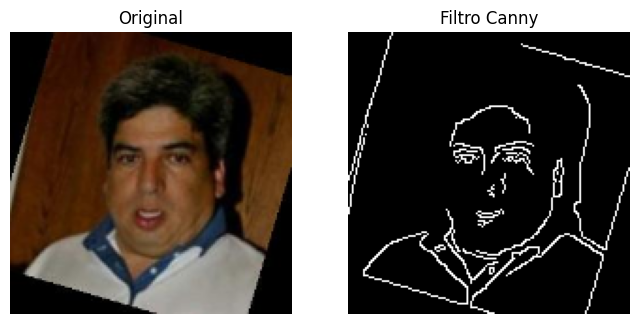

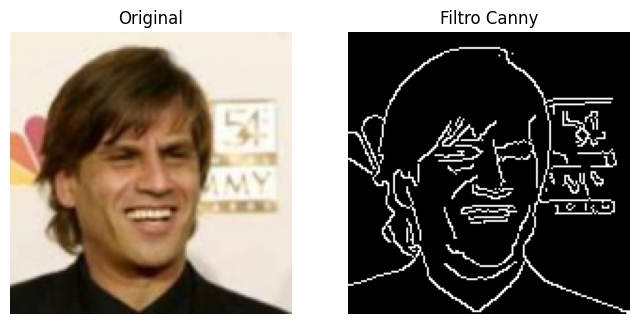

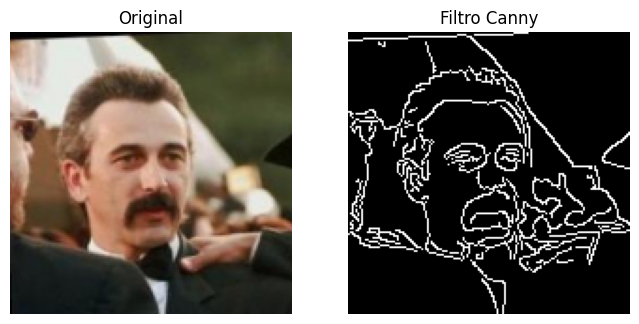

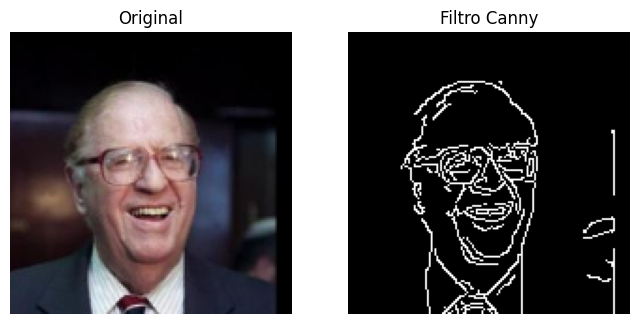

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

ruta = '/content/drive/MyDrive/MODO 6 CCD REDES NEURONALES /DATOSTAREA2/lfw-deepfunneled/lfw-deepfunneled'

# Listar solo carpetas válidas
carpetas = [c for c in os.listdir(ruta) if not c.startswith('.') and os.path.isdir(os.path.join(ruta, c))]

print("Número de personas:", len(carpetas))

# Mostrar algunas imágenes de ejemplo (con verificación)
for persona in carpetas[:5]:  # mostramos 5 personas distintas
    imagenes = os.listdir(os.path.join(ruta, persona))
    for imagen in imagenes[:1]:  # solo una imagen por persona
        path_imagen = os.path.join(ruta, persona, imagen)
        img = cv2.imread(path_imagen)

        if img is None:
            print(f"No se pudo leer la imagen: {path_imagen}")
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (150, 150))

        plt.imshow(img)
        plt.title(f"{persona}")
        plt.axis('off')
        plt.show()

# Aplicar un filtro (e.g., filtro Canny)
def aplicar_filtro(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    filtro = cv2.Canny(gray, 100, 200)
    return filtro

# Mostrar resultados con el filtro aplicado
for persona in carpetas[:10]: #numero de personas
    imagenes = os.listdir(os.path.join(ruta, persona))
    for imagen in imagenes[:1]: #numero de imagenes de esa persona
        path_imagen = os.path.join(ruta, persona, imagen)
        img = cv2.imread(path_imagen)

        if img is None:
            print(f"No se pudo leer la imagen: {path_imagen}")
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (150, 150))

        filtro = aplicar_filtro(img)

        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(img)
        plt.title('Original')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(filtro, cmap='gray')
        plt.title('Filtro Canny')
        plt.axis('off')

        plt.show()



Se utilizó el filtro Canny ya que permite detectar bordes en imágenes de manera eficiente. Esto es útil en el contexto del reconocimiento facial, ya que resalta las estructuras importantes del rostro como los ojos, boca y contorno general. Además, permite una representación simplificada pero significativa para tareas posteriores como clasificación o clustering.



## Reparar el dataset de rostros LFW (Labelled Faces in the Wild) para que pueda usarse en el entrenamiento de una red neuronal convolucional (CNN).
Esto implica transformar imágenes y etiquetas en datos numéricos compatibles con modelos de aprendizaje profundo, igual que en el ejemplo de MNIST.

Convertir imágenes a arrays (X)

Crear etiquetas (y) a partir del nombre de la carpeta

Codificar las etiquetas como números

Tener X_train, X_test, y_train, y_test listos para un modelo

Crear una red neuronal convolucional (CNN) que pueda clasificar rostros según la persona a la que pertenecen, usando imágenes de la base de datos LFW (Labeled Faces in the Wild). El objetivo es que el modelo aprenda patrones visuales en las caras (forma de los ojos, nariz, boca, etc.) para distinguir entre diferentes personas.



In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Ruta base donde están las carpetas de personas
ruta = '/content/drive/MyDrive/MODO 6 CCD REDES NEURONALES /DATOSTAREA2/lfw-deepfunneled/lfw-deepfunneled'

# Variables para almacenar datos
imagenes = []
etiquetas = []

for persona in os.listdir(ruta):
    if persona.startswith('.'):
        continue
    ruta_persona = os.path.join(ruta, persona)
    if not os.path.isdir(ruta_persona):
        continue
    archivos = os.listdir(ruta_persona)

    if len(archivos) < 2:
        continue  # Saltamos personas con menos de 2 imágenes

    for archivo in archivos:
        path_imagen = os.path.join(ruta_persona, archivo)
        img = cv2.imread(path_imagen)
        if img is None:
            continue
        img = cv2.resize(img, (64, 64))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        imagenes.append(img)
        etiquetas.append(persona)


# Convertir a arrays
X = np.array(imagenes) / 255.0  # Normalizar
y = np.array(etiquetas)

# Codificar etiquetas (nombres → números)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_cat = to_categorical(y_encoded)  # one-hot

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, stratify=y_encoded, random_state=42)

print("Datos listos:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("Clases:", encoder.classes_)


Datos listos:
X_train: (7331, 64, 64, 3)
y_train: (7331, 1680)
Clases: ['Aaron_Peirsol' 'Aaron_Sorkin' 'Abdel_Nasser_Assidi' ... 'Zico'
 'Zinedine_Zidane' 'Zoran_Djindjic']


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Crear el modelo
modelo = Sequential()

# Capa convolucional 1
modelo.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
modelo.add(MaxPooling2D(pool_size=(2, 2)))

# Capa convolucional 2
modelo.add(Conv2D(64, (3, 3), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2)))

# Aplanar y capas densas
modelo.add(Flatten())
modelo.add(Dense(128, activation='relu'))
modelo.add(Dropout(0.5))  # Para evitar sobreajuste
modelo.add(Dense(y_train.shape[1], activation='softmax'))  # Output: número de clases

# Compilar el modelo
modelo.compile(optimizer=Adam(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Resumen
modelo.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1680)                │         216,720 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,841,872 (7.03 MB)

 Trainable params: 1,841,872 (7.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrenar la red
historial = modelo.fit(X_train, y_train,
                       epochs=10,
                       batch_size=32,
                       validation_data=(X_test, y_test))


Epoch 1/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 50s 208ms/step - accuracy: 0.0483 - loss: 7.1262 - val_accuracy: 0.0578 - val_loss: 6.5713
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 77s 191ms/step - accuracy: 0.0568 - loss: 6.6875 - val_accuracy: 0.0578 - val_loss: 6.4985
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 46s 199ms/step - accuracy: 0.0576 - loss: 6.5513 - val_accuracy: 0.0616 - val_loss: 6.4070
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 80s 190ms/step - accuracy: 0.0644 - loss: 6.3505 - val_accuracy: 0.0780 - val_loss: 6.2607
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 45s 194ms/step - accuracy: 0.0853 - loss: 6.0821 - val_accuracy: 0.0971 - val_loss: 6.0856
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 44s 191ms/step - accuracy: 0.1017 - loss: 5.7995 - val_accuracy: 0.1151 - val_loss: 5.9202
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 82s 193ms/step - accuracy: 0.1123 - loss: 5.5394 - val_accuracy: 0.1288 - val_loss: 5.8381
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 44s 192ms/step - accuracy: 0.1395 - loss: 5

 ¿Qué está aprendiendo esta red?
En las capas convolucionales: detecta patrones visuales locales.

En las capas densas: aprende a clasificar basándose en combinaciones de esos patrones.

En la capa de salida: decide a quién pertenece el rostro, basado en lo que ha aprendido.

58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.1555 - loss: 5.7683
Precisión en prueba: 16.20%


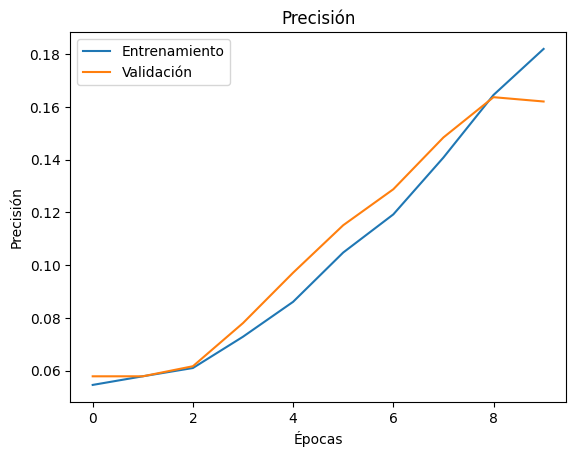

In [ ]:
# Evaluar el modelo
loss, acc = modelo.evaluate(X_test, y_test)
print(f"Precisión en prueba: {acc*100:.2f}%")

# Graficar el historial de entrenamiento
import matplotlib.pyplot as plt

plt.plot(historial.history['accuracy'], label='Entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Validación')
plt.title("Precisión")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.legend()
plt.show()
